In [12]:
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import time



In [13]:
# ------------------------------
# 1. Load the Graph
# ------------------------------

print("Checkpoint: Loading graph from file...")
G = nx.read_edgelist(r"E:\SNU Chennai\projects\SNA project\SNA-Project\as-caida\data.txt", nodetype=int)
print("Graph loaded!")
#print(nx.info(G))

Checkpoint: Loading graph from file...
Graph loaded!



Checkpoint: Starting degree centrality computation...
Degree centrality computed.

Top 5 nodes by degree centrality:
  Node 82: 0.09927
  Node 58: 0.07751
  Node 31: 0.06418
  Node 230: 0.06335
  Node 43: 0.06161

Computing spring_layout layout... (This may take time)


Computing Layout:   0%|          | 0/500 [00:00<?, ?node/s]

Computing Layout: 100%|██████████| 500/500 [00:00<00:00, 565.53node/s]


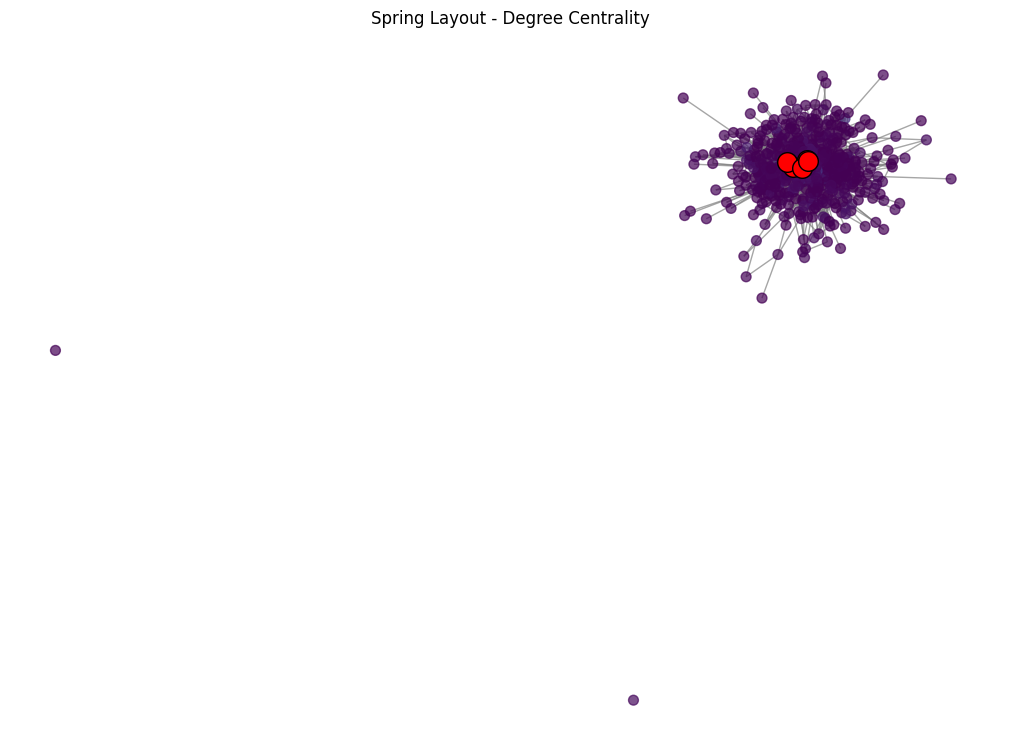


Computing kamada_kawai_layout layout... (This may take time)


Computing Layout: 100%|██████████| 500/500 [00:13<00:00, 35.87node/s]


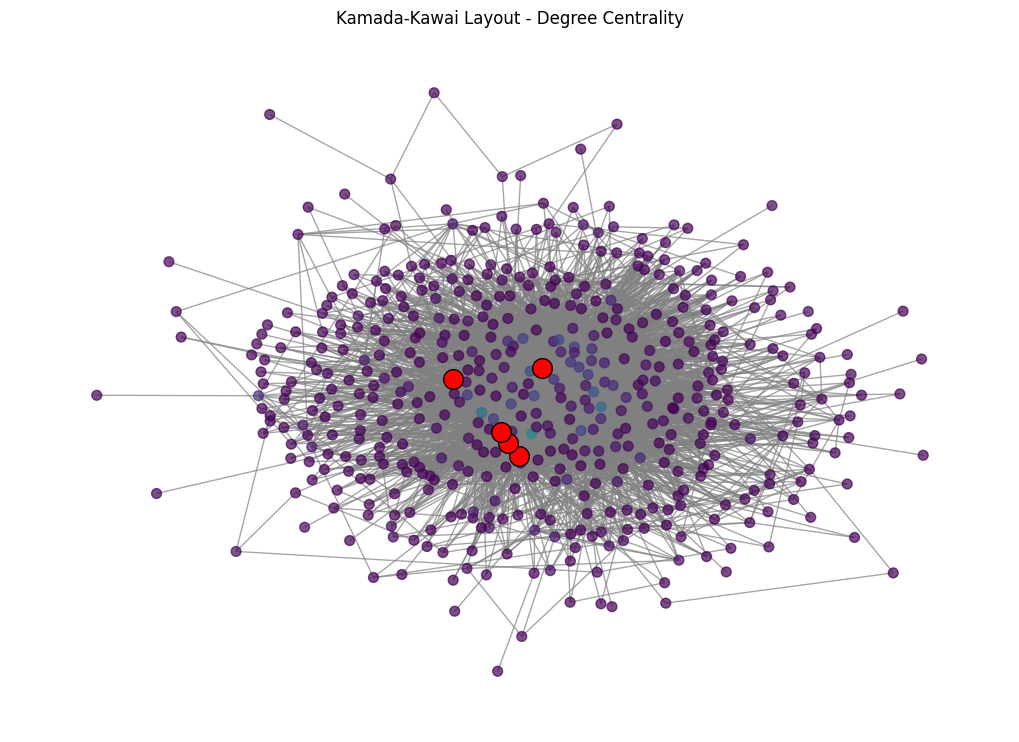

In [16]:
# ------------------------------
# 2. Compute Degree Centrality
# ------------------------------
print("\nCheckpoint: Starting degree centrality computation...")
degree_centrality = nx.degree_centrality(G)
print("Degree centrality computed.")

# Sort and get top 500 nodes
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:500]
print("\nTop 5 nodes by degree centrality:")
for node, cent in top_degree[:5]:  # Print only the top 5
    print(f"  Node {node}: {cent:.5f}")

# Extract top 500 nodes for visualization
top_nodes = [node for node, _ in top_degree]
subgraph = G.subgraph(top_nodes)  # Create a subgraph for plotting

# Normalize centrality values for coloring
centrality_values = np.array([degree_centrality[node] for node in subgraph.nodes()])
node_colors = centrality_values / max(centrality_values)  # Normalize to [0,1]

# ------------------------------
# 3. Visualization with tqdm ETA
# ------------------------------

def compute_layout_with_progress(layout_func, G):
    """ Compute layout with tqdm progress tracking """
    print(f"\nComputing {layout_func.__name__} layout... (This may take time)")
    pos = {}  # Dictionary to store node positions
    nodes = list(G.nodes())

    with tqdm(total=len(nodes), desc="Computing Layout", unit="node") as pbar:
        raw_pos = layout_func(G)  # Compute all positions at once
        for node in nodes:
            pos[node] = raw_pos[node]  # Assign positions iteratively
            pbar.update(1)  # Update progress bar

    return pos

def plot_graph(layout_func, title):
    """ Plot graph with progress tracking """
    pos = compute_layout_with_progress(layout_func, subgraph)
    
    plt.figure(figsize=(10, 7))
    nx.draw(subgraph, pos, node_color=node_colors, cmap=plt.cm.viridis, 
            node_size=50, edge_color="gray", alpha=0.7)
    
    # Highlight top 5 nodes
    top_5_nodes = [node for node, _ in top_degree[:5]]
    nx.draw_networkx_nodes(subgraph, pos, nodelist=top_5_nodes, node_color='red', node_size=200, edgecolors="black")

    plt.title(title)
    plt.show()

# Spring Layout Visualization
plot_graph(nx.spring_layout, "Spring Layout - Degree Centrality")

# Kamada-Kawai Layout Visualization
plot_graph(nx.kamada_kawai_layout, "Kamada-Kawai Layout - Degree Centrality")


Checkpoint: Starting eigenvector centrality computation...
Eigenvector centrality computed.

Top 5 nodes by eigenvector centrality:
  Node 82: 0.32509
  Node 58: 0.23800
  Node 43: 0.23282
  Node 230: 0.21204
  Node 31: 0.20241

Computing spring_layout layout... (This may take time)


Computing Layout: 100%|██████████| 500/500 [00:00<00:00, 589.30node/s]


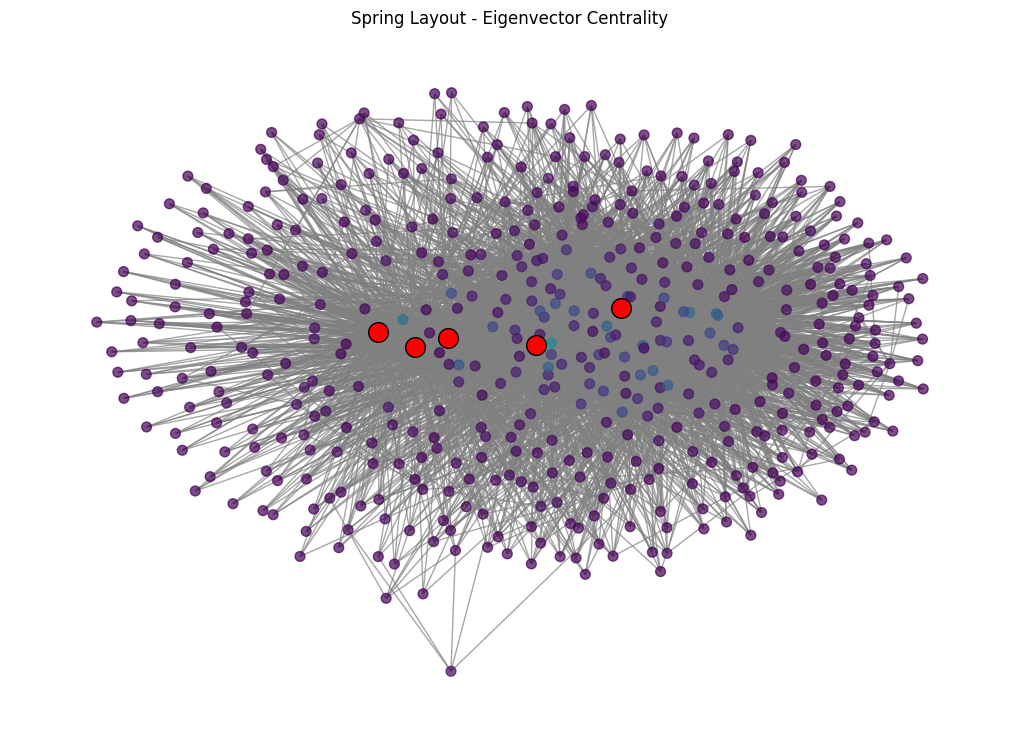


Computing kamada_kawai_layout layout... (This may take time)


Computing Layout: 100%|██████████| 500/500 [00:09<00:00, 51.86node/s]


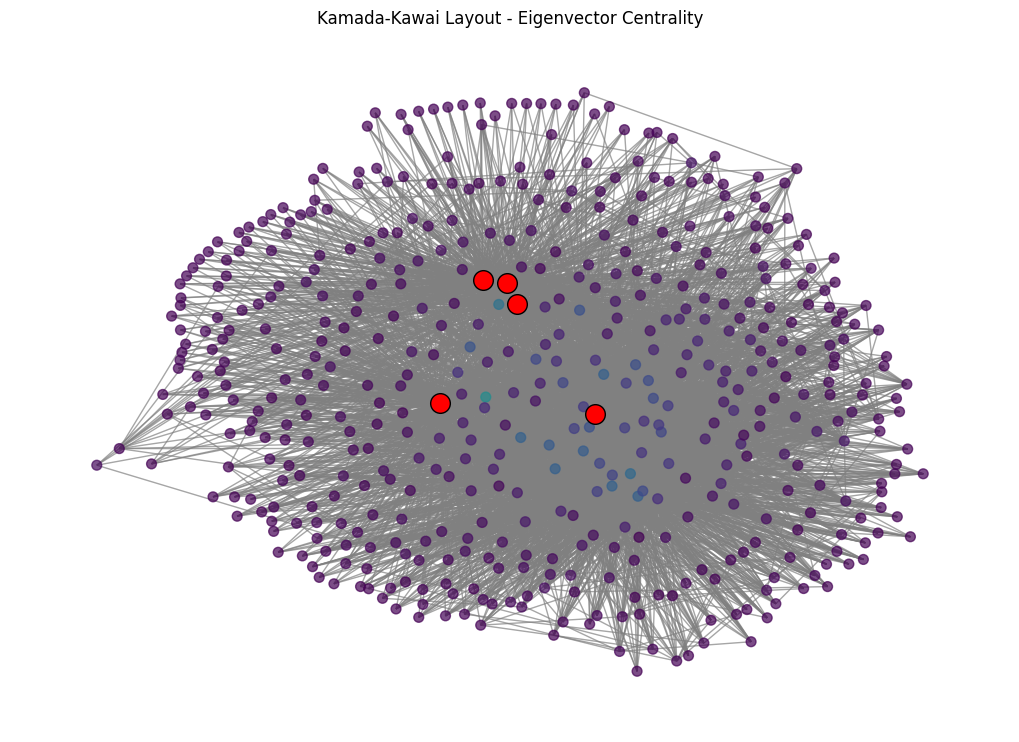

In [17]:
# ------------------------------
# 2. Compute Eigenvector Centrality
# ------------------------------
print("\nCheckpoint: Starting eigenvector centrality computation...")
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
print("Eigenvector centrality computed.")

# Sort and get top 500 nodes
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:500]
print("\nTop 5 nodes by eigenvector centrality:")
for node, cent in top_eigenvector[:5]:  # Print only the top 5
    print(f"  Node {node}: {cent:.5f}")

# Extract top 500 nodes for visualization
top_nodes = [node for node, _ in top_eigenvector]
subgraph = G.subgraph(top_nodes)  # Create a subgraph for plotting

# Normalize centrality values for coloring
centrality_values = np.array([eigenvector_centrality[node] for node in subgraph.nodes()])
node_colors = centrality_values / max(centrality_values)  # Normalize to [0,1]

# ------------------------------
# 3. Visualization with tqdm ETA
# ------------------------------

def compute_layout_with_progress(layout_func, G):
    """ Compute layout with tqdm progress tracking """
    print(f"\nComputing {layout_func.__name__} layout... (This may take time)")
    pos = {}  # Dictionary to store node positions
    nodes = list(G.nodes())

    with tqdm(total=len(nodes), desc="Computing Layout", unit="node") as pbar:
        raw_pos = layout_func(G)  # Compute all positions at once
        for node in nodes:
            pos[node] = raw_pos[node]  # Assign positions iteratively
            pbar.update(1)  # Update progress bar

    return pos

def plot_graph(layout_func, title):
    """ Plot graph with progress tracking """
    pos = compute_layout_with_progress(layout_func, subgraph)
    
    plt.figure(figsize=(10, 7))
    nx.draw(subgraph, pos, node_color=node_colors, cmap=plt.cm.viridis, 
            node_size=50, edge_color="gray", alpha=0.7)
    
    # Highlight top 5 nodes
    top_5_nodes = [node for node, _ in top_eigenvector[:5]]
    nx.draw_networkx_nodes(subgraph, pos, nodelist=top_5_nodes, node_color='red', node_size=200, edgecolors="black")

    plt.title(title)
    plt.show()

# Spring Layout Visualization
plot_graph(nx.spring_layout, "Spring Layout - Eigenvector Centrality")

# Kamada-Kawai Layout Visualization
plot_graph(nx.kamada_kawai_layout, "Kamada-Kawai Layout - Eigenvector Centrality")


Checkpoint: Starting Katz centrality computation...
Katz centrality computed.

Top 5 nodes by Katz centrality:
  Node 82: 0.09489
  Node 58: 0.07544
  Node 31: 0.06428
  Node 230: 0.06401
  Node 43: 0.06355

Computing spring_layout layout... (This may take time)


Computing Layout: 100%|██████████| 500/500 [00:00<00:00, 582.32node/s]


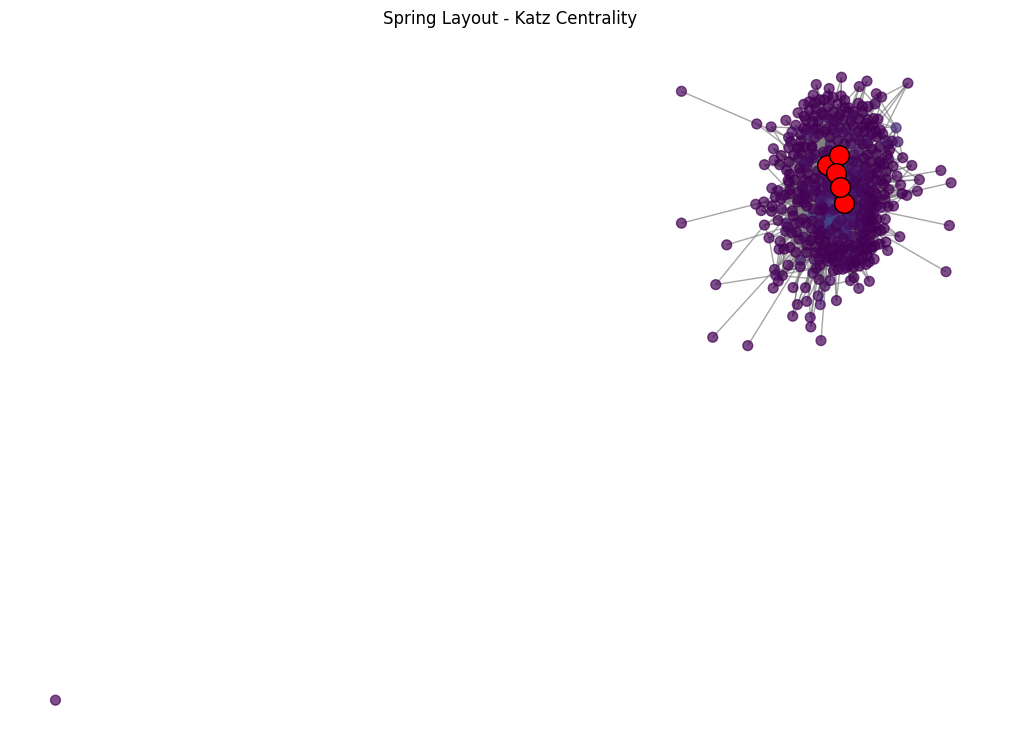


Computing kamada_kawai_layout layout... (This may take time)


Computing Layout: 100%|██████████| 500/500 [00:08<00:00, 56.23node/s]


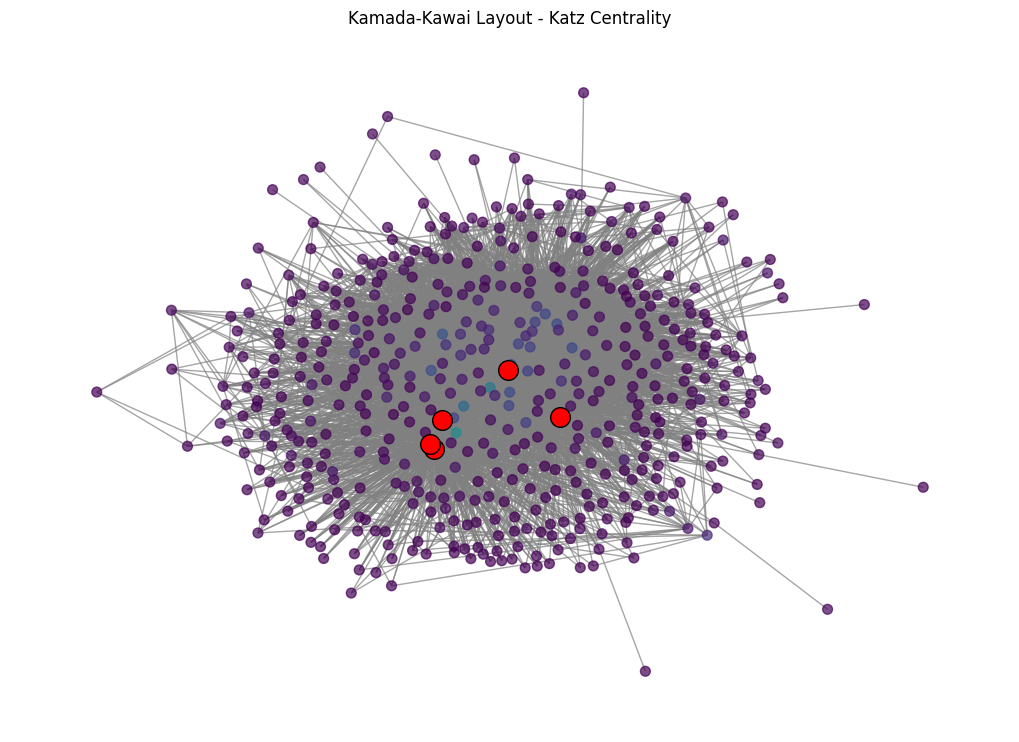

In [18]:
# ------------------------------
# 2. Compute Katz Centrality
# ------------------------------
print("\nCheckpoint: Starting Katz centrality computation...")
# Adjust alpha empirically if needed
try:
    katz_centrality = nx.katz_centrality(G, alpha=0.005, beta=1.0, max_iter=1000)
    print("Katz centrality computed.")
except nx.PowerIterationFailedConvergence:
    print("Eigenvalue computation did not converge. Consider lowering alpha or increasing max_iter.")
    katz_centrality = {}

# Sort and get top 500 nodes
top_katz = sorted(katz_centrality.items(), key=lambda x: x[1], reverse=True)[:500]
print("\nTop 5 nodes by Katz centrality:")
for node, cent in top_katz[:5]:  # Print only the top 5
    print(f"  Node {node}: {cent:.5f}")

# Extract top 500 nodes for visualization
top_nodes = [node for node, _ in top_katz]
subgraph = G.subgraph(top_nodes)  # Create a subgraph for plotting

# Normalize centrality values for coloring
centrality_values = np.array([katz_centrality[node] for node in subgraph.nodes()])
node_colors = centrality_values / max(centrality_values)  # Normalize to [0,1]

# ------------------------------
# 3. Visualization with tqdm ETA
# ------------------------------

def compute_layout_with_progress(layout_func, G):
    """ Compute layout with tqdm progress tracking """
    print(f"\nComputing {layout_func.__name__} layout... (This may take time)")
    pos = {}  # Dictionary to store node positions
    nodes = list(G.nodes())

    with tqdm(total=len(nodes), desc="Computing Layout", unit="node") as pbar:
        raw_pos = layout_func(G)  # Compute all positions at once
        for node in nodes:
            pos[node] = raw_pos[node]  # Assign positions iteratively
            pbar.update(1)  # Update progress bar

    return pos

def plot_graph(layout_func, title):
    """ Plot graph with progress tracking """
    pos = compute_layout_with_progress(layout_func, subgraph)
    
    plt.figure(figsize=(10, 7))
    nx.draw(subgraph, pos, node_color=node_colors, cmap=plt.cm.viridis, 
            node_size=50, edge_color="gray", alpha=0.7)
    
    # Highlight top 5 nodes
    top_5_nodes = [node for node, _ in top_katz[:5]]
    nx.draw_networkx_nodes(subgraph, pos, nodelist=top_5_nodes, node_color='red', node_size=200, edgecolors="black")

    plt.title(title)
    plt.show()

# Spring Layout Visualization
plot_graph(nx.spring_layout, "Spring Layout - Katz Centrality")

# Kamada-Kawai Layout Visualization
plot_graph(nx.kamada_kawai_layout, "Kamada-Kawai Layout - Katz Centrality")


Checkpoint: Starting PageRank computation...
PageRank computed.

Top 5 nodes by PageRank:
  Node 82: 0.02157
  Node 58: 0.01736
  Node 230: 0.01386
  Node 31: 0.01344
  Node 43: 0.01251

Computing spring_layout layout... (This may take time)


Computing Layout: 100%|██████████| 500/500 [00:00<00:00, 613.71node/s]


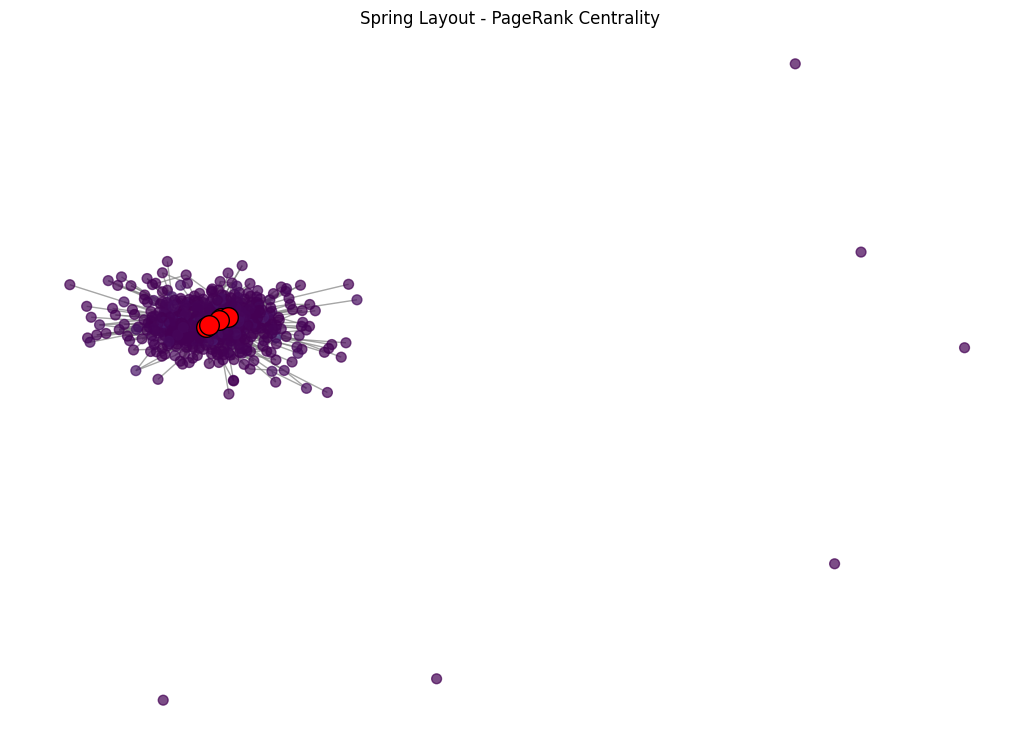


Computing kamada_kawai_layout layout... (This may take time)


Computing Layout: 100%|██████████| 500/500 [00:09<00:00, 54.38node/s]


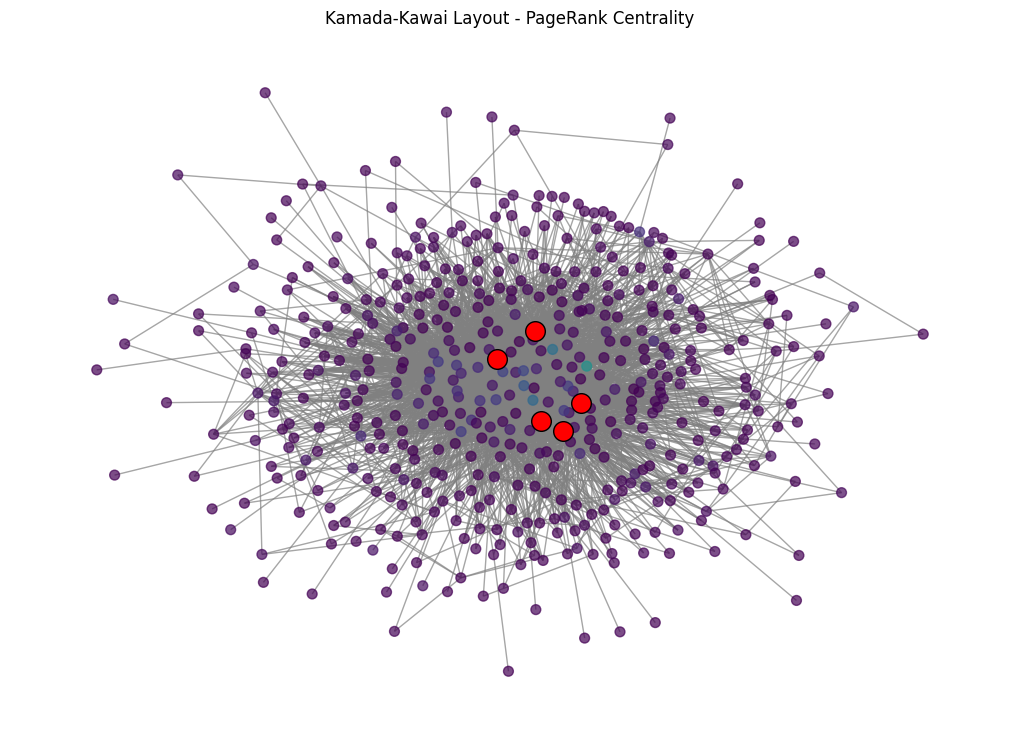

In [19]:
# ------------------------------
# 2. Compute PageRank Centrality
# ------------------------------
print("\nCheckpoint: Starting PageRank computation...")
pagerank = nx.pagerank(G, alpha=0.85)
print("PageRank computed.")

# Sort and get top 500 nodes
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:500]
print("\nTop 5 nodes by PageRank:")
for node, cent in top_pagerank[:5]:  # Print only the top 5
    print(f"  Node {node}: {cent:.5f}")

# Extract top 500 nodes for visualization
top_nodes = [node for node, _ in top_pagerank]
subgraph = G.subgraph(top_nodes)  # Create a subgraph for plotting

# Normalize centrality values for coloring
centrality_values = np.array([pagerank[node] for node in subgraph.nodes()])
node_colors = centrality_values / max(centrality_values)  # Normalize to [0,1]

# ------------------------------
# 3. Visualization with tqdm ETA
# ------------------------------

def compute_layout_with_progress(layout_func, G):
    """ Compute layout with tqdm progress tracking """
    print(f"\nComputing {layout_func.__name__} layout... (This may take time)")
    pos = {}  # Dictionary to store node positions
    nodes = list(G.nodes())

    with tqdm(total=len(nodes), desc="Computing Layout", unit="node") as pbar:
        raw_pos = layout_func(G)  # Compute all positions at once
        for node in nodes:
            pos[node] = raw_pos[node]  # Assign positions iteratively
            pbar.update(1)  # Update progress bar

    return pos

def plot_graph(layout_func, title):
    """ Plot graph with progress tracking """
    pos = compute_layout_with_progress(layout_func, subgraph)
    
    plt.figure(figsize=(10, 7))
    nx.draw(subgraph, pos, node_color=node_colors, cmap=plt.cm.viridis, 
            node_size=50, edge_color="gray", alpha=0.7)
    
    # Highlight top 5 nodes
    top_5_nodes = [node for node, _ in top_pagerank[:5]]
    nx.draw_networkx_nodes(subgraph, pos, nodelist=top_5_nodes, node_color='red', node_size=200, edgecolors="black")

    plt.title(title)
    plt.show()

# Spring Layout Visualization
plot_graph(nx.spring_layout, "Spring Layout - PageRank Centrality")

# Kamada-Kawai Layout Visualization
plot_graph(nx.kamada_kawai_layout, "Kamada-Kawai Layout - PageRank Centrality")

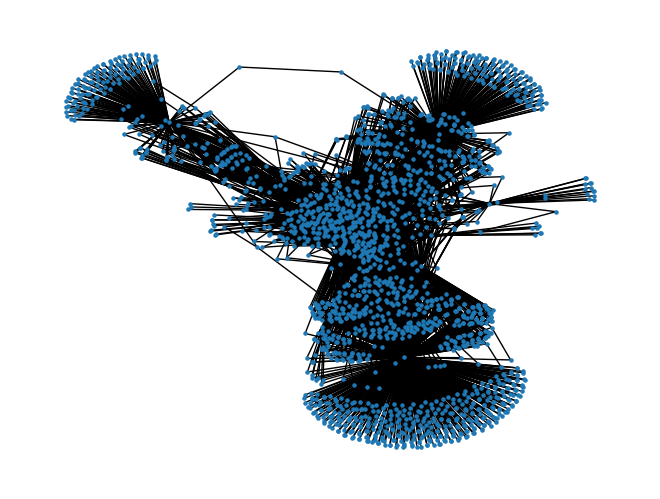


All computations completed!


In [35]:
# ------------------------------
# Visualizing a Small Portion of the Graph
# ------------------------------
sub_nodes = list(G.nodes())[:2000]
subG = G.subgraph(sub_nodes)
nx.draw(subG, node_size=5, with_labels=False)
plt.show()

print("\nAll computations completed!")